In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [36]:
df = pd.read_csv("Zoo.csv")

In [37]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [38]:
# dropping 'animal name' because it's just a label, not useful for KNN classification
df.drop(columns=["animal name"], inplace=True)

In [39]:
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [40]:
df.isnull().sum()

,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0
breathes,0


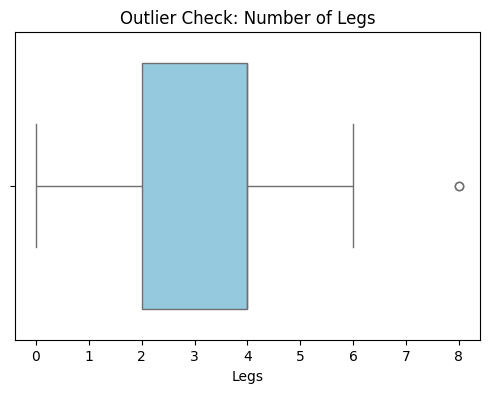

In [41]:
# checking for outliers in the 'legs' column using a boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["legs"], color="skyblue")
plt.title("Outlier Check: Number of Legs")
plt.xlabel("Legs")
plt.show()

In [56]:
# scaling all features to make Euclidean distance fair
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df.drop(columns=["type"]))   # scale once

In [57]:
# converting scaled array back to DataFrame for readability
scaled_df = pd.DataFrame(scaled_array, columns=df.drop(columns=["type"]).columns)

In [58]:
scaled_df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,-0.415948,0.588784,-0.384353,1.138180
97,1.161395,-0.496904,0.843721,-0.826640,1.791182,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,3.409545,-0.449868,1.561027,-1.698416,-0.384353,-0.878595
98,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
99,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,-0.293294,-0.449868,-1.404435,-1.698416,-0.384353,-0.878595


In [54]:
# splitting the dataset into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_df, df["type"], test_size=0.2, random_state=42)

In [46]:
# training the KNN model with default K=5 and Euclidean distance
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
# making predictions on the test set
y_pred = knn.predict(X_test)

# evaluating model performance with clean precision handling
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.9523809523809523
Precision: 0.9206349206349207
Recall: 0.9523809523809523
F1 Score: 0.9333333333333333


In [60]:
# Comparing actual vs predicted
comparison_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})
print(comparison_df)

    Actual  Predicted
0        1          1
1        1          1
2        1          1
3        1          1
4        1          1
5        6          6
6        1          1
7        1          1
8        1          1
9        1          1
10       4          4
11       6          6
12       6          6
13       2          2
14       7          7
15       1          1
16       1          1
17       2          2
18       4          4
19       1          1
20       3          4


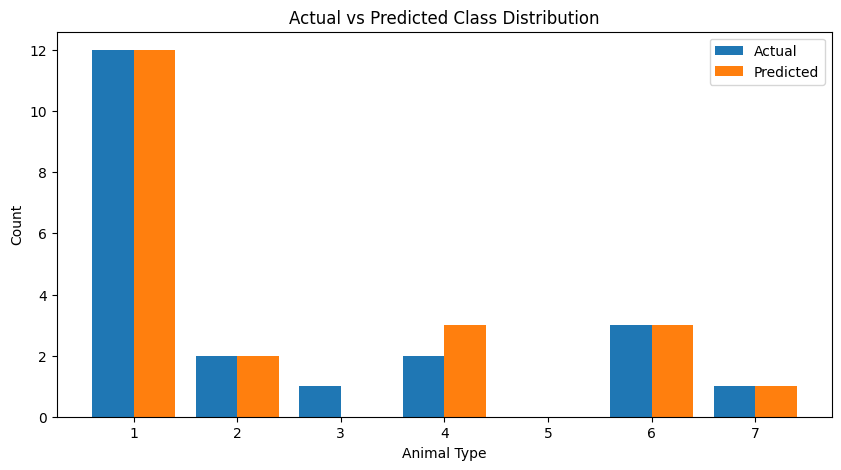

In [49]:
# Count of actual vs predicted
actual_counts = pd.Series(y_test).value_counts().sort_index()
pred_counts = pd.Series(y_pred).value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
plt.bar(actual_counts.index - 0.2, actual_counts.values, width=0.4, label='Actual')
plt.bar(pred_counts.index + 0.2, pred_counts.values, width=0.4, label='Predicted')
plt.xlabel("Animal Type")
plt.ylabel("Count")
plt.title("Actual vs Predicted Class Distribution")
plt.legend()
plt.show()


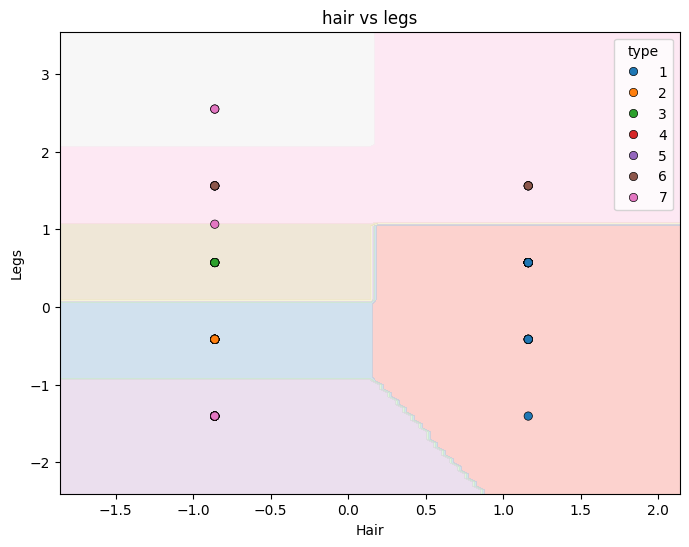

In [59]:
# Pick features
X = scaled_df[["hair", "legs"]].values
y = df["type"]

# Train KNN
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X, y)

# Create grid
xx, yy = np.meshgrid(
    np.arange(X[:, 0].min()-1, X[:, 0].max()+1, 0.05),
    np.arange(X[:, 1].min()-1, X[:, 1].max()+1, 0.05)
)

# Predict for grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap="Pastel1", alpha=0.6)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y.astype(str), palette="tab10", edgecolor='k')
plt.title("hair vs legs")
plt.xlabel("Hair")
plt.ylabel("Legs")
plt.show()


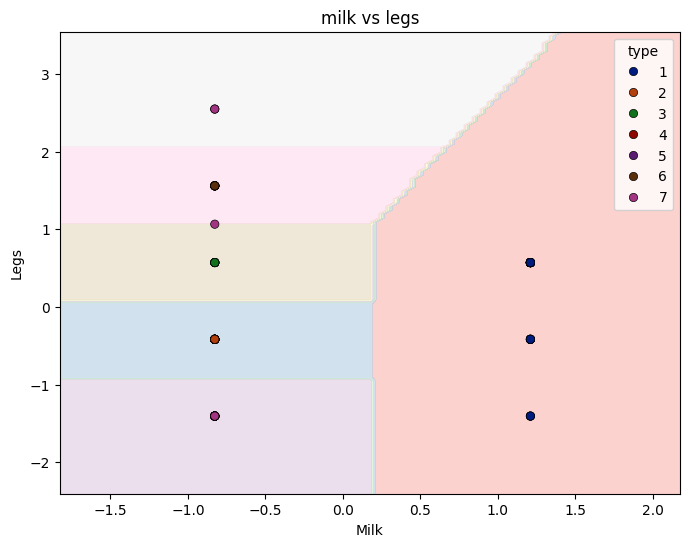

In [51]:
# Pick features
X = scaled_df[["milk", "legs"]].values
y = df["type"]

# Train KNN
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X, y)

# Create grid
xx, yy = np.meshgrid(
    np.arange(X[:, 0].min()-1, X[:, 0].max()+1, 0.05),
    np.arange(X[:, 1].min()-1, X[:, 1].max()+1, 0.05)
)

# Predict for grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap="Pastel1", alpha=0.6)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y.astype(str), palette="tab10", edgecolor='k')
plt.title("milk vs legs")
plt.xlabel("Milk")
plt.ylabel("Legs")
plt.show()


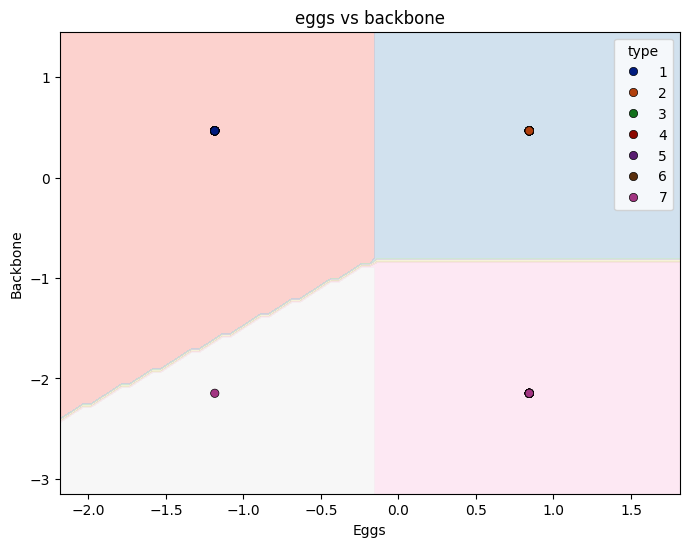

In [52]:
# Pick features
X = scaled_df[["eggs", "backbone"]].values
y = df["type"]

# Train KNN
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X, y)

# Create grid
xx, yy = np.meshgrid(
    np.arange(X[:, 0].min()-1, X[:, 0].max()+1, 0.05),
    np.arange(X[:, 1].min()-1, X[:, 1].max()+1, 0.05)
)

# Predict for grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap="Pastel1", alpha=0.6)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y.astype(str), palette="tab10", edgecolor='k')
plt.title("eggs vs backbone")
plt.xlabel("Eggs")
plt.ylabel("Backbone")
plt.show()


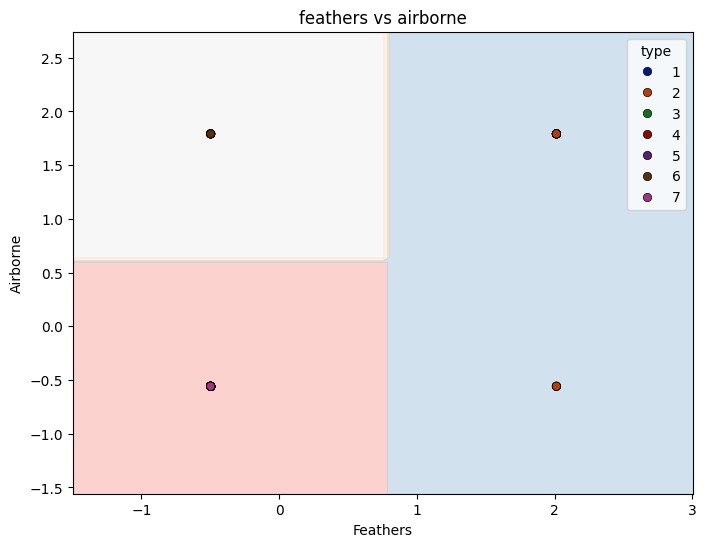

In [53]:
# Pick features
X = scaled_df[["feathers", "airborne"]].values
y = df["type"]

# Train KNN
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X, y)

# Create grid
xx, yy = np.meshgrid(
    np.arange(X[:, 0].min()-1, X[:, 0].max()+1, 0.05),
    np.arange(X[:, 1].min()-1, X[:, 1].max()+1, 0.05)
)

# Predict for grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap="Pastel1", alpha=0.6)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y.astype(str), palette="tab10", edgecolor='k')
plt.title("feathers vs airborne")
plt.xlabel("Feathers")
plt.ylabel("Airborne")
plt.show()
